# 🧪 Ki-Kare Testi: Kategorik Değişkenler Arası Bağımsızlığı Sınamak

## Giriş: Cinsiyet ile memnuniyet arasında gerçek bir fark var mı?

Diyelim ki:
- 200 kişiye anket yaptın
- `Cinsiyet`: Erkek / Kadın
- `Memnuniyet`: Memnun / Memnun değil

Peki bu iki değişken arasında **istatistiksel olarak anlamlı bir bağımsızlık var mı?**

## 🔍 Ki-Kare Testi Nedir?

**Ki-kare testi**, gözlenen frekansların beklenen frekanslardan ne kadar farklı olduğunu ölçer.

📌 Yani temel soru:
> “Bu iki kategorik değişken gerçekten **bağımsız** mı? Yoksa bir ilişki mi var?”

## 📐 Formülü:

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

| Sembol | Açıklama |
|--------|-----------|
| $O_i$ | Gözlenen frekans |
| $E_i$ | Beklenen frekans (eğer bağımsız olsalardı elde edilecek frekans) |
| $\chi^2$ | Ki-kare test istatistiği |

📌 Bu değer yüksekse → fark tesadüfi değil, yani değişkenler **bağımlı**
- p-değeri < 0.05 → H₀ reddedilir

## 🛠️ Adım Adım Uygulama: Gerçek Hayat Senaryosu

### Örnek: Anket Sonuçları

|                   | Memnun | Memnun Değil |
|-------------------|--------|---------------|
| **Erkek**          | 60     | 40            |
| **Kadın**          | 70     | 30            |

#### Soru:
“Cinsiyete göre memnuniyet oranı farklı mı?”

---

### Adım 1: Hipotez Kurulumu

```python
print("H₀: Cinsiyet ile memnuniyet oranı bağımsızdır")
print("H₁: Cinsiyet ile memnuniyet oranı arasında ilişki vardır")
```

📌 Null hipotezi → bağımsız değişkenler  
Alternatif → aralarında ilişki var

### Adım 2: Sample Veri Üret

Bu tabloya uygun NumPy/Pandas yapısı oluşturacağız:


In [1]:
import numpy as np
import pandas as pd

# Gözlenen frekans tablosu
gozlenen = np.array([[60, 40], [70, 30]])
print("Gözlenen Frekans Tablosu:\n", gozlenen)

Gözlenen Frekans Tablosu:
 [[60 40]
 [70 30]]


### Adım 3: Ki-Kare Testi Yap

In [2]:
from scipy.stats import chi2_contingency

chi2, p_degeri, dof, expected = chi2_contingency(gozlenen)

print("Beklenen Frekanslar:\n", expected)
print(f"Chi² değeri: {chi2:.2f}, p-değeri: {p_degeri:.4f}")

Beklenen Frekanslar:
 [[65. 35.]
 [65. 35.]]
Chi² değeri: 1.78, p-değeri: 0.1821


📌 p-değeri > 0.05 → **H₀ reddedilemez**  
Yani: Cinsiyetle memnuniyet oranı arasında **istatistiksel anlamlı bir fark yok**

### Adım 4: Karar Ver

In [3]:
alpha = 0.05
if p_degeri < alpha:
    print("✅ H₀ reddedildi → Cinsiyet ve memnuniyet ilişkilidir.")
else:
    print("❌ H₀ reddedilemedi → İlişki istatistiksel olarak yok")

❌ H₀ reddedilemedi → İlişki istatistiksel olarak yok


📌 Yani:
Test sonucunda cinsiyetle memnuniyet arasında **anlamlı bir ilişki bulunamadı.**

## 📈 Görselleştirme: Kategorik Frekanslar Nasıl Dağılıyor?

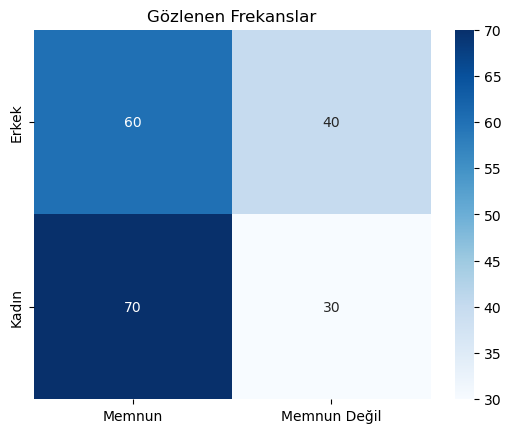

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(gozlenen, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Memnun", "Memnun Değil"],
            yticklabels=["Erkek", "Kadın"])
plt.title("Gözlenen Frekanslar")
plt.show()

## 📊 Beklenen Frekans Nedir?

Eğer değişkenler **bağımsız olsaydı**, beklenen frekanslar şöyle olurdu:

In [6]:
print("Beklenen Frekanslar:\n", expected)

Beklenen Frekanslar:
 [[65. 35.]
 [65. 35.]]


📌 Fark küçük → p-değeri de büyük çıkıyor

## 📉 Varsayımlar Ne?

| Varsayım | Açıklama |
|---------|----------|
| ✅ **Kategorik veri** | Nominal veya ordinal olmalı |
| ✅ **Bağımsız gözlemler** | Her gözlem bağımsız olmalı |
| ✅ **Beklenen frekanslar ≥ 5 olmalı** | Küçük hücreler problem yaratır |
| ❌ **Normallik gerekmiyor** | Çünkü normal dağılmayan verilerde bile geçerlidir |

📌 Eğer varsayımlar sağlanmıyorsa → Fisher Exact Testi düşünülmeli

## 📌 Ki-Kare Testi Türleri Nelerdir?

| Test Türü | Kullanım Durumu |
|-----------|----------------|
| **Ki-Kare Bağımsızlık Testi** | İki kategorik değişken arası ilişki |
| **Ki-Kare Uyum İyiliği Testi** | Gözlenen veri belirli bir dağılıma uyuyor mu? |
| **Fisher Exact Testi** | Hücre sayısının çok küçük olduğu durumlar için |

📌 En yaygın kullanılanı → bağımsızlık testi


## 🧠 Ki-Kare Testi Ne Zaman Kullanılır?

| Alan | Açıklama |
|------|----------|
| **Pazarlama** | Cinsiyetle ilgi alanı ilişkisi |
| **Sosyal Bilimler** | Eğitim düzeyine göre politik tercih analizi |
| **Sağlık** | Tedavi türüne göre iyileşme oranları |
| **Veri Bilimi** | Feature selection için kategorik özellikler |

📌 Özellikle feature engineering ve model kurulumlarında kullanışlı

## 📋 Ki-Kare Testi ve Modelleme Süreci Bağlantısı

| Araç | Açıklama |
|------|----------|
| **ANOVA** | Sayısal vs kategorik değişkenlerde etki |
| **Korelasyon** | Sayısal değişkenler arası ilişki |
| **Ki-Kare** | Kategorik değişkenler arasındaki ilişkiyi ölçer |
| **Mutual Information** | Özellik seçimi için alternatif yöntem |

📌 Model kuruyorsun ama bazı değişkenler işe yaramıyor → onları  çıkarman gerekir.